c:\Users\Lenovo\.anaconda\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 175s 90ms/step - accuracy: 0.8965 - loss: 0.3290 - val_accuracy: 0.9853 - val_loss: 0.0458
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 226s 103ms/step - accuracy: 0.9841 - loss: 0.0472 - val_accuracy: 0.9901 - val_loss: 0.0296
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 173s 87ms/step - accuracy: 0.9891 - loss: 0.0330 - val_accuracy: 0.9888 - val_loss: 0.0370
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 203s 88ms/step - accuracy: 0.9918 - loss: 0.0255 - val_accuracy: 0.9893 - val_loss: 0.0303
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 194s 83ms/step - accuracy: 0.9938 - loss: 0.0187 - val_accuracy: 0.9929 - val_loss: 0.0252
313/313 - 6s - 20ms/step - accuracy: 0.9929 - loss: 0.0252
Test accuracy: 0.992900013923645


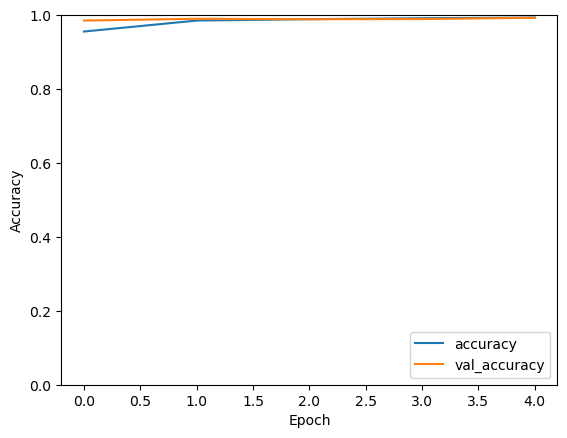

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step


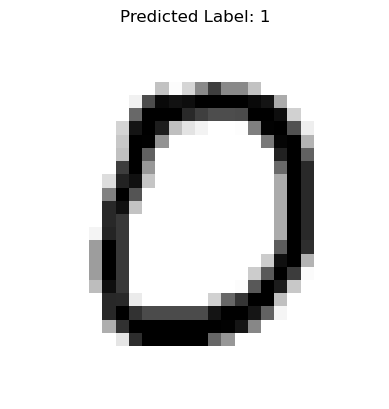

Actual Label: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


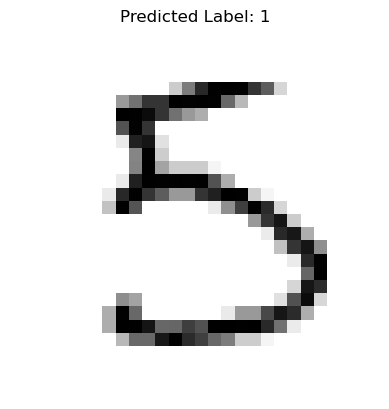

Actual Label: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


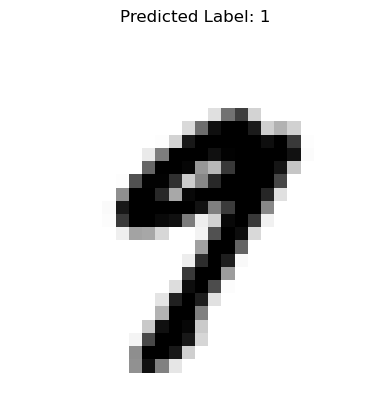

Actual Label: 9


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

"""**Load and Preprocess Data**"""

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the data
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Convert labels to categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

"""**Build the Convolutional Neural Network (CNN)**"""

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

"""**Train the Model**"""

history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

"""**Evaluate the Model**"""

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

"""**Visualize Training History**"""

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

"""**Recognize Handwritten Characters**"""

def predict_and_display(image):

    if image.shape != (28, 28, 1):
        raise ValueError("Input image must be of shape (28, 28, 1)")

    # Preprocess the image
    image = np.array(image).reshape((1, 28, 28, 1)) / 255.0

    # Predict the label
    prediction = model.predict(image)
    predicted_label = np.argmax(prediction)

    # Display the image and the predicted label
    plt.imshow(image.reshape(28, 28), cmap=plt.cm.binary)
    plt.title(f'Predicted Label: {predicted_label}')
    plt.axis('off')
    plt.show()

    return predicted_label

sample_index = 10
predicted_label = predict_and_display(test_images[sample_index])
print(f'Actual Label: {np.argmax(test_labels[sample_index])}')

sample_index = 15
predicted_label = predict_and_display(test_images[sample_index])
print(f'Actual Label: {np.argmax(test_labels[sample_index])}')

sample_index = 20
predicted_label = predict_and_display(test_images[sample_index])
print(f'Actual Label: {np.argmax(test_labels[sample_index])}')